### ライブラリをインポート

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

 ### ランダムパターンを変更

In [12]:
torch.manual_seed(123) 

### データセットxを0~1の500等分に変更

In [13]:

a = 2 # とりあえずの重みを設定
b = 1 # とりあえずの切片を設定

tensor_x = torch.linspace(0, 1, 500)

x = tensor_x.view(500, 1) # （1）なぜ 100 x 1のテンソルに変換するのか　100とは何か　1とは何か

eps = torch.randn(500, 1)
y = a * x + b + eps

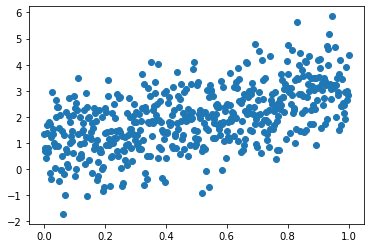

In [14]:
plt.scatter(x, y)

### ネットワークモデルの定義

In [15]:
class Nakamura_LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        output = self.linear(x)
        return output

In [16]:
model = Nakamura_LR()

In [17]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [18]:
losses = []
num_epoch = 1000
for epoch in range(num_epoch):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: {}, loss: {}".format(epoch, loss.item()))
        losses.append(loss.item())

epoch: 0, loss: 3.529277801513672
epoch: 10, loss: 3.4156265258789062
epoch: 20, loss: 3.3075709342956543
epoch: 30, loss: 3.204833745956421
epoch: 40, loss: 3.1071529388427734
epoch: 50, loss: 3.0142743587493896
epoch: 60, loss: 2.9259650707244873
epoch: 70, loss: 2.84199595451355
epoch: 80, loss: 2.7621538639068604
epoch: 90, loss: 2.686232805252075
epoch: 100, loss: 2.6140408515930176
epoch: 110, loss: 2.5453925132751465
epoch: 120, loss: 2.4801113605499268
epoch: 130, loss: 2.4180331230163574
epoch: 140, loss: 2.358997344970703
epoch: 150, loss: 2.30285382270813
epoch: 160, loss: 2.2494606971740723
epoch: 170, loss: 2.1986796855926514
epoch: 180, loss: 2.1503841876983643
epoch: 190, loss: 2.10444974899292
epoch: 200, loss: 2.0607595443725586
epoch: 210, loss: 2.019202709197998
epoch: 220, loss: 1.9796736240386963
epoch: 230, loss: 1.9420721530914307
epoch: 240, loss: 1.906302571296692
epoch: 250, loss: 1.8722747564315796
epoch: 260, loss: 1.8399029970169067
epoch: 270, loss: 1.8091

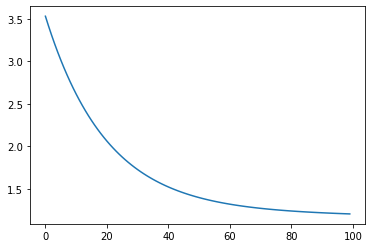

In [19]:
plt.plot(losses)

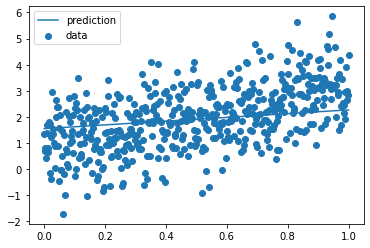

In [20]:
x_test = torch.linspace(0, 1, 500).view(500, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()